# Laboratorio 2
### Entrega: martes 31 de agosto 2021, 23:59 horas

Integrantes:
- Ricardo Coronado
- Eduardo Hopperdietzel
- Diego Sandoval

## Algunas Variables Aleatorias Especiales
En este laboratorio revisaremos algunos tipos de variables aleatorias especiales, definidas por que tienen  distribuciones de probabilidad conocidas. Trabajaremos tanto con v.a. discretas como continuas, y calcularemos y graficaremos las probabilidades teóricas (probabilidaes puntutales, funciones de  densidad y de distribución de probabilidad) y luego las vamos a comparar con datos obtenidos por simulación.

### Estadísticos asociados
1. Posición:  tendencia central y no central
   percentiles, media, moda

2. Dispersión: 
    Varianza, desviación estándar

3. Forma: 
    asimetría, curtosis. 
    
   $$\text{ Asimetría (skewness) }= \frac{E[(X-\mu)^3]}{\sigma^3}$$
   $$\text{ Curtosis }= \frac{E[(X-\mu)^4]}{\sigma^4} - 3$$

In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
import scipy.stats as stats
import math

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.dpi'] = 200

from IPython.core.pylabtools import figsize


#### Distribución Bernoulli
Suponga que se realiza un ensayo cuya salida es "éxito" o "falla". La v.a. entonces tiene sólo dos valores posibles: 1 si "éxito" 0 si no. Si $p$ es la probabilidad de éxito, entonces:

$\begin{equation}
\begin{array}{lll} 
P(X=1) & = &p \qquad y \qquad P(X=0) = 1-p \\
P(X = i) & = & p^i (1-p)^{1-i} \,, i=0,1\\
E[X] & = & 1*p + 0*p = p\\
E[X^2] & = & 1*p + 0*p = p\\
Var(X) & = & E[X^2] - (E[X])^2 = p - p^2 = p(1-p)\\
\end{array}
\end{equation}$


#### Distribución Binomial
Suponga que se realizan $N$  ensayos independientes idénticos  Bernoulli  de parámetro $p$. La v.a. X que representa el número $k$ de ensayos existosos entre los $N$ ensayos realizados, se denomina Binomial y cumple:

$\begin{equation}
\begin{array}{lll} 
P(X=k) & = & {N \choose k} p^k (1-p)^{N-k}, \qquad k=0,1,...N \\
E[X] & = & Np\\
Var(X) & = & Np(1-p)\\
Simetria(X) & = & \frac{1-2p}{\sqrt{np(1-p)}}\\
Curtosis(X) & = & \frac{1-6p(1-p)}{np(1-p)}\\
\end{array}
\end{equation}$

### Simulación Variable Aleatoria con Distribución Binomial
En esta sección utilizaremos la función generadora de valores aleatorios para la distribución binomial, y se compara la distribución empírica con la distribución teórica

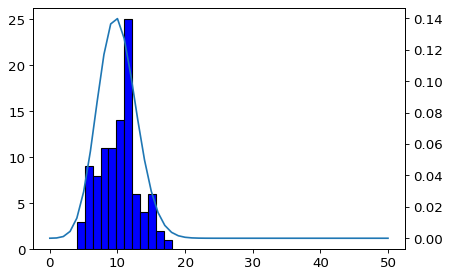

In [2]:
# Número de simulaciones
size = 100

# Número de ensayos
n = 50

# Probabilidad de éxito
p = 0.2

# Arreglo de resultados de cada simulación ( size simulaciones )
datos_bin = stats.binom.rvs(n=n, p=p, size=size) 

# Histograma distribución empírica
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=80)
ax.hist(datos_bin, color = 'blue', edgecolor = 'black', bins = int(50/4))

# Probabilidad teórica
vec = list(range(n+1))

pvec = []
for i in vec:
    pvec.append(stats.binom.pmf(k=i, n=n, p=p))
    
# Gráfica distribución teórica
ax2 = ax.twinx()
ax2.plot(vec,pvec)
plt.draw()

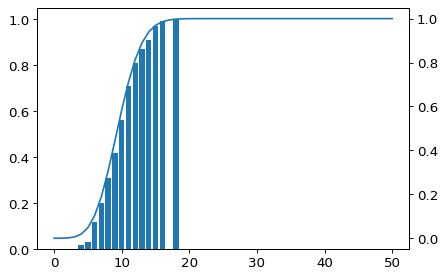

In [3]:
# Calcula la distribución empírica acumulada
def ecdf(data):
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

x,cum_bin = ecdf(datos_bin)

# Gráfica distribución empírica acumulada
fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)
ax.bar(x,cum_bin)

# Probabilidad teórica
pvec = []
for i in vec:
    pvec.append(stats.binom.cdf(k=i, n=n, p=p))

# Gráfica distribución teórica acumulada
ax2 = ax.twinx()
ax2.plot(vec,pvec)
plt.draw()

In [4]:
# Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_bin)/size
var_emp = sum((datos_bin - promedio)*(datos_bin-promedio))/size
asim = stats.skew(datos_bin)
curtos = stats.kurtosis(datos_bin)
print('esperanza empírica:',promedio,' teórica: ',n*p)
print('varianza empírica:',var_emp,' teórica: ', n*p*(1-p))
print('asimetría empírica:', asim, 'teórica: ',(1-2*p)/(math.sqrt(n*p*(1-p))))
print('curtosis empírico: ', curtos, 'teórico: ',(1-6*p*(1-p))/(n*p*(1-p)))

esperanza empírica: 10.09  teórica:  10.0
varianza empírica: 8.261900000000002  teórica:  8.0
asimetría empírica: 0.22564620545736716 teórica:  0.21213203435596423
curtosis empírico:  -0.32695545500455925 teórico:  0.004999999999999977


In [5]:
# Calcula diferencia relativa de estádisticos
# teóricos vs empíricos con diversos números de simulacioens
def relDiffEstadisticos(n,p,precision):
    
    # Arreglo de número de simulaciones
    simulaciones = np.arange(2,10050,10)
    
    # Estadísticos teóricos
    med_teo = n*p
    var_teo = n*p*(1-p)
    asi_teo = (1-2*p)/(math.sqrt(n*p*(1-p)))
    cur_teo = (1-6*p*(1-p))/(n*p*(1-p))
    
    # Almacena estádisticos empíticos de cada iteración
    med_emp = np.zeros(simulaciones.size)
    var_emp = np.zeros(simulaciones.size)
    asi_emp = np.zeros(simulaciones.size)
    cur_emp = np.zeros(simulaciones.size)
    
    for i in range(simulaciones.size):
        
        # Arreglo de resultados de cada simulación ( size simulaciones )
        datos_bin = stats.binom.rvs(n=n, p=p, size=simulaciones[i]) 
        
        ## Cálculo de esperanza y varianza empírica y teórica
        med_emp[i] = np.sum(datos_bin)/simulaciones[i]
        var_emp[i] = sum((datos_bin - med_emp[i])*(datos_bin-med_emp[i]))/simulaciones[i]
        asi_emp[i] = stats.skew(datos_bin)
        cur_emp[i] = stats.kurtosis(datos_bin)
    
    # Diferencia relativa
    med_diff = abs((med_teo - med_emp)/med_teo)
    var_diff = abs((var_teo - var_emp)/var_teo)
    asi_diff = abs((asi_teo - asi_emp)/asi_teo)
    cur_diff = abs((cur_teo - cur_emp)/cur_teo)
    
    # Límite de error
    l1 = np.argwhere(med_diff>precision)
    l2 = np.argwhere(var_diff>precision)
    l3 = np.argwhere(asi_diff>precision)
    l4 = np.argwhere(cur_diff>precision)
    
    if l1.size != 0:
        med_lim = simulaciones[l1[-1]]
    else:
        med_lim = 0
        
    if l2.size != 0:
        var_lim = simulaciones[l2[-1]]
    else:
        var_lim = 0
        
    if l3.size != 0:
        asi_lim = simulaciones[l3[-1]]
    else:
        asi_lim = 0
        
    if l4.size != 0:
        cur_lim = simulaciones[l4[-1]]
    else:
        cur_lim = 0
        
    # Gráfica distribución empírica acumulada
    fig, ax = plt.subplots(2, 2,figsize=(14, 9), dpi=80)
    
    ax[0][0].set_title("Diff Rel Media")
    ax[0][1].set_title("Diff Rel Varianza")
    ax[1][0].set_title("Diff Rel Asimetría")
    ax[1][1].set_title("Diff Rel Curtosis")
    
    ax[0][0].plot(simulaciones,med_diff)
    ax[0][1].plot(simulaciones,var_diff)
    ax[1][0].plot(simulaciones,asi_diff)
    ax[1][1].plot(simulaciones,cur_diff)
    
    ax[0][0].axvline(x=med_lim, color="red")
    ax[0][0].text(med_lim,max(med_diff)/2," " + str(med_lim), color="red")
    ax[0][1].axvline(x=var_lim, color="red")
    ax[0][1].text(var_lim,max(var_diff)/2," " + str(var_lim), color="red")
    ax[1][0].axvline(x=asi_lim, color="red")
    ax[1][0].text(asi_lim,max(asi_diff)/2," " + str(asi_lim), color="red")
    ax[1][1].axvline(x=cur_lim, color="red")
    ax[1][1].text(cur_lim,max(cur_diff)/2," " + str(cur_lim), color="red")

#### Ejercicio 1: 
1) ¿Cuántas simulaciones es necesario hacer para acercarse a los valores teóricos?

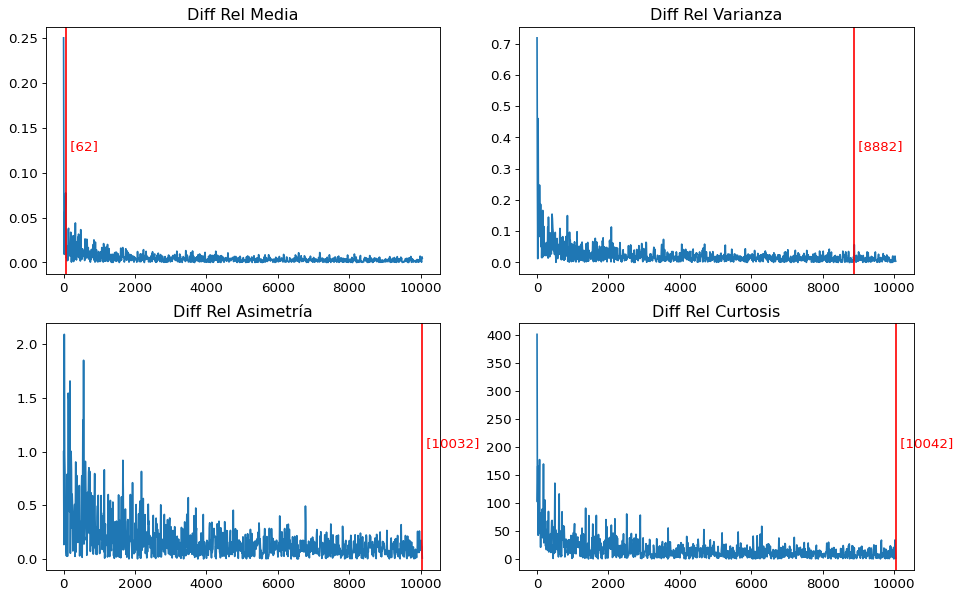

In [6]:
relDiffEstadisticos(n=50,p=0.2,precision=0.05)

Con los parámetros actuales podemos observar que a partir de aproximadamente 1000 simulaciones la diferencia relativa entre los estadísticos empíricos y teoricos se mantiene constante.
Si fijamos un margen de diferencia relativa procentual de 5%, podemos ver que la media requiere de aproximadamente 100 simulaciones y la varianza sobre 5000.
Para la asimetría y curtosis, vemos que sobre 10000 simulaciones aún existen casos con diferencia relativa mayor a 5%.

2) Cambie los valores de los parámetros y analice si hay cambios en su respuesta en (1)

Utilizando la misma función anterior podemos ver que si aumentamos el número de ensayos (N), se necesitan menos simulaciones para que el error relativo de la media sea pequeño, sin embargo ocurre lo contrario para los demás estadísticos.

Respecto al parámetro p vemos que no genera un cambio significativo en la convergencia de la media y varianza, pero si para la asimetría y curtosis. Mientras más cercano sea p a 0.5, mayor es el número de simulaciones necesarias para que la diferencia entre los valores empiricos y teóricos disminuyan.

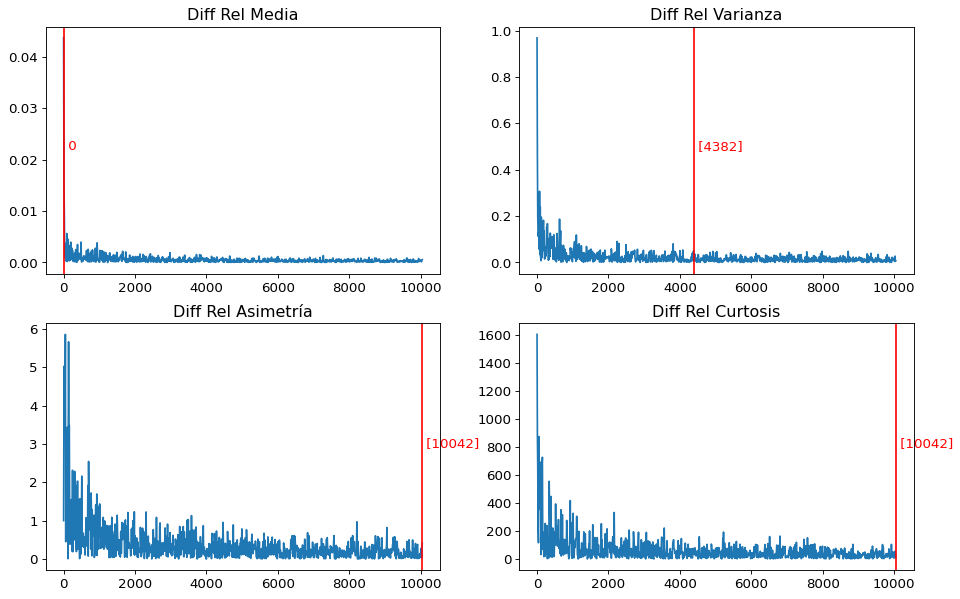

In [7]:
relDiffEstadisticos(n=200,p=0.8,precision=0.05)

#### Ejercicio 2: 
Realice un desarrollo similar al caso de la Distribución Binomial para el caso de una variable aleatoria con Distribución de Probabilidad Poisson

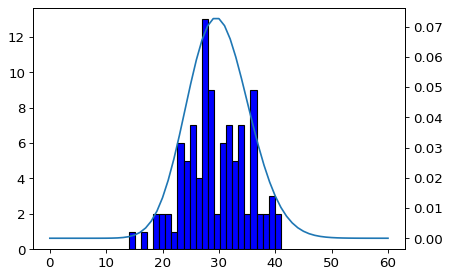

In [8]:
# Número de simulaciones
size = 100

# Tasa ( parámetro de la distribución de poisson )
lamd = 30

# Arreglo de resultados de cada simulación ( size simulaciones )
datos_poi = stats.poisson.rvs(mu=lamd, size=size) 

# Histograma distribución empírica
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=80)
ax.hist(datos_poi, color = 'blue', edgecolor = 'black', bins = len(np.unique(datos_poi)))

# Probabilidad teórica
vec = list(range(lamd*2+1))

pvec = []
for i in vec:
    pvec.append(stats.poisson.pmf(i,lamd))
    
# Gráfica distribución teórica
ax2 = ax.twinx()
ax2.plot(vec,pvec)
plt.draw()

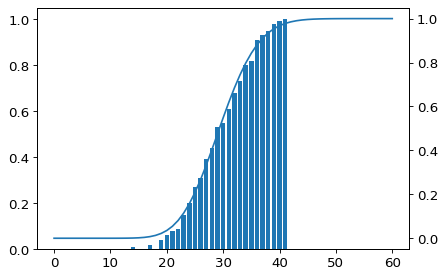

In [9]:
# Calcula la distribución empírica acumulada
def ecdf(data):
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

x,cum_poi = ecdf(datos_poi)

# Gráfica distribución empírica acumulada
fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)
ax.bar(x,cum_poi)

# Probabilidad teórica
pvec = []
for i in vec:
    pvec.append(stats.poisson.cdf(i, lamd))

# Gráfica distribución teórica acumulada
ax2 = ax.twinx()
ax2.plot(vec,pvec)
plt.draw()

In [10]:
# Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_poi)/size
var_emp = sum((datos_poi - promedio)*(datos_poi-promedio))/size
asim = stats.skew(datos_poi)
curtos = stats.kurtosis(datos_poi,fisher=False)
print('esperanza empírica:',promedio,' teórica: ',lamd)
print('varianza empírica:',var_emp,' teórica: ', lamd)
print('asimetría empírica:', asim, 'teórica: ',pow(lamd,-0.5))
print('curtosis empírico: ', curtos, 'teórico: ',3+pow(lamd,-1))

esperanza empírica: 29.42  teórica:  30
varianza empírica: 31.283600000000007  teórica:  30
asimetría empírica: -0.16740383350503493 teórica:  0.18257418583505536
curtosis empírico:  2.5243074740044036 teórico:  3.033333333333333


In [11]:
# Calcula diferencia relativa de estádisticos
# teóricos vs empíricos con diversos números de simulacioens
def relDiffEstadisticosPoisson(lamd,precision):
    
    # Arreglo de número de simulaciones
    simulaciones = np.arange(2,10050,10)
    
    # Estadísticos teóricos
    med_teo = lamd
    var_teo = lamd
    asi_teo = pow(lamd,-0.5)
    cur_teo = 3+pow(lamd,-1)
    
    # Almacena estádisticos empíticos de cada iteración
    med_emp = np.zeros(simulaciones.size)
    var_emp = np.zeros(simulaciones.size)
    asi_emp = np.zeros(simulaciones.size)
    cur_emp = np.zeros(simulaciones.size)
    
    for i in range(simulaciones.size):
        
        # Arreglo de resultados de cada simulación ( size simulaciones )
        datos_poi = stats.poisson.rvs(mu=lamd, size=simulaciones[i]) 
        
        ## Cálculo de esperanza y varianza empírica y teórica
        med_emp[i] = np.sum(datos_poi)/simulaciones[i]
        var_emp[i] = sum((datos_poi - med_emp[i])*(datos_poi-med_emp[i]))/simulaciones[i]
        asi_emp[i] = stats.skew(datos_poi)
        cur_emp[i] = stats.kurtosis(datos_poi,fisher=False)
    
    # Diferencia relativa
    med_diff = abs((med_teo - med_emp)/med_teo)
    var_diff = abs((var_teo - var_emp)/var_teo)
    asi_diff = abs((asi_teo - asi_emp)/asi_teo)
    cur_diff = abs((cur_teo - cur_emp)/cur_teo)
    
    # Límite de error
    l1 = np.argwhere(med_diff>precision)
    l2 = np.argwhere(var_diff>precision)
    l3 = np.argwhere(asi_diff>precision)
    l4 = np.argwhere(cur_diff>precision)
    
    if l1.size != 0:
        med_lim = simulaciones[l1[-1]]
    else:
        med_lim = 0
        
    if l2.size != 0:
        var_lim = simulaciones[l2[-1]]
    else:
        var_lim = 0
        
    if l3.size != 0:
        asi_lim = simulaciones[l3[-1]]
    else:
        asi_lim = 0
        
    if l4.size != 0:
        cur_lim = simulaciones[l4[-1]]
    else:
        cur_lim = 0
        
    # Gráfica distribución empírica acumulada
    fig, ax = plt.subplots(2, 2,figsize=(14, 9), dpi=80)
    
    ax[0][0].set_title("Diff Rel Media")
    ax[0][1].set_title("Diff Rel Varianza")
    ax[1][0].set_title("Diff Rel Asimetría")
    ax[1][1].set_title("Diff Rel Curtosis")
    
    ax[0][0].plot(simulaciones,med_diff)
    ax[0][1].plot(simulaciones,var_diff)
    ax[1][0].plot(simulaciones,asi_diff)
    ax[1][1].plot(simulaciones,cur_diff)
    
    ax[0][0].axvline(x=med_lim, color="red")
    ax[0][0].text(med_lim,max(med_diff)/2," " + str(med_lim), color="red")
    ax[0][1].axvline(x=var_lim, color="red")
    ax[0][1].text(var_lim,max(var_diff)/2," " + str(var_lim), color="red")
    ax[1][0].axvline(x=asi_lim, color="red")
    ax[1][0].text(asi_lim,max(asi_diff)/2," " + str(asi_lim), color="red")
    ax[1][1].axvline(x=cur_lim, color="red")
    ax[1][1].text(cur_lim,max(cur_diff)/2," " + str(cur_lim), color="red")

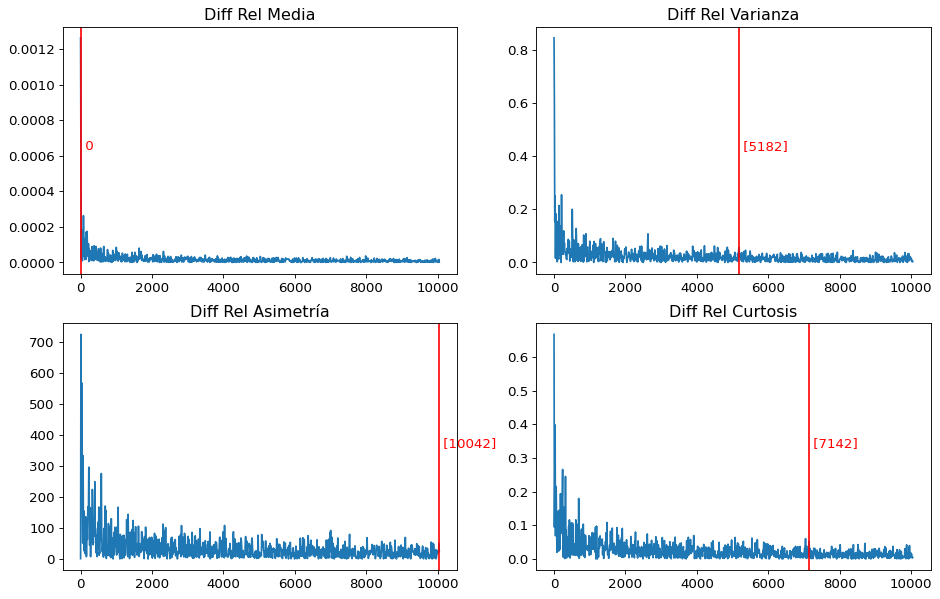

In [12]:
relDiffEstadisticosPoisson(1000000,0.05)

Podemos ver que a medida que aumentamos el valor del parámetro lambda, se necesitan menos simulaciones para que la diferencia de la media, variaza y curtosis empíricas respecto a las teóricas disminuya. En cuanto a la asimetría, ocurre lo contrario. 

#### Distribución Normal o Gaussiana
Sea $X$ v.a. continua, es normal de media $\mu$ y varianza $\sigma^2$ y se denota $\cal{N}(\mu,\sigma^2)$ si su densidad de probabilidad cumple:


$\begin{equation}
\begin{array}{lll} 
f_X(x) & = & \frac{1}{\sqrt{2\pi}\sigma} exp(\frac{-(x-\mu)^2}{2\sigma^2})\qquad, -\infty < x <\infty\\
E[X] &= &\mu\\
Var(X)& =& \sigma^2\\
\end{array}
\end{equation}$

Esta es la distribución de probabilidad mas utilizada. Muchas variables se distribuyen aproximadamente normales (altura, peso, satisfacción en el trabajo, etc.). 

Permite modelar los errores o ruidos.

¿Cómo se verifica que una v.a. sigue una distribución normal?

Test de normalidad de Shapiro-Wilk, Q-Q plot


### Simulación Variable Aleatoria con Distribución Normal
En esta sección utilizaremos la función generadora de valores aleatorios para la distribución normal, y se compara la distribución empírica con la distribución teórica

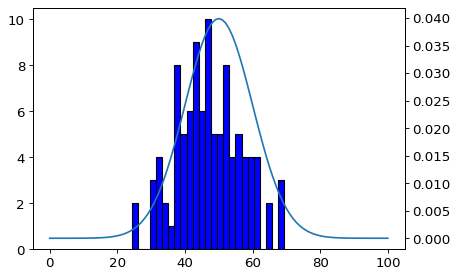

In [13]:
# Número de simulaciones
size = 100

# Media
mu = 50

# Varianza
sigma = 10

# Arreglo con resultados de cada simulación
datos_norm = stats.norm.rvs(loc=mu, scale=sigma, size=size) 

# Histograma distribución empírica
fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)
ax.hist(datos_norm, color = 'blue', edgecolor = 'black', bins = int(2*mu/4))

# Distribución teórica
vec = list(range(2*mu+1))
pvec = []
for i in vec:
    pvec.append(stats.norm.pdf(x=i, loc=mu, scale= sigma))

# Gráfica distribución teórica
ax2 = ax.twinx()
ax2.plot(vec,pvec)
plt.draw()

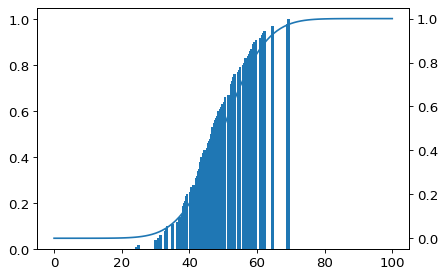

In [14]:
## gráfica de la distribución empírica acumulada
def ecdf(data):
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)

x,cum_norm = ecdf(datos_norm)
ax.bar(x,cum_norm)

## probabilidad teórica
ax2 = ax.twinx()
vec = list(range(2*mu+1))
##
pvec = []
for i in vec:
    pvec.append(stats.norm.cdf(x=i, loc=mu, scale=sigma))
ax2.plot(vec,pvec)
plt.draw()


In [15]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_norm)/size
var_emp = sum((datos_norm - promedio)*(datos_norm-promedio))/size
asim = stats.skew(datos_norm)
curtos = stats.kurtosis(datos_norm)
print('esperanza empírica:',promedio,' teórica: ',mu)
print('varianza empírica:',var_emp,' teórica: ', sigma*sigma)
print('asimetría empírica:', asim, 'teórica: ',0)
print('curtosis empírico: ', curtos, 'teórico: ',0)

esperanza empírica: 47.10249289834012  teórica:  50
varianza empírica: 93.46065190776773  teórica:  100
asimetría empírica: 0.09592156976323035 teórica:  0
curtosis empírico:  -0.29400521154827963 teórico:  0


In [16]:
# Calcula diferencia absoluta de estádisticos
# teóricos vs empíricos con diversos números de simulacioens
def absDiffEstadisticosNorm(mu,sigma):
    
    # Arreglo de número de simulaciones
    simulaciones = np.arange(5,50000,100)
    
    # Estadísticos teóricos
    med_teo = mu
    var_teo = sigma*sigma
    asi_teo = 0
    cur_teo = 0
    
    # Almacena estádisticos empíticos de cada iteración
    med_emp = np.zeros(simulaciones.size)
    var_emp = np.zeros(simulaciones.size)
    asi_emp = np.zeros(simulaciones.size)
    cur_emp = np.zeros(simulaciones.size)
    
    for i in range(simulaciones.size):
        
        # Arreglo de resultados de cada simulación ( size simulaciones )
        datos_norm = stats.norm.rvs(loc=mu, scale=sigma, size=simulaciones[i]) 
        
        ## Cálculo de esperanza y varianza empírica y teórica
        med_emp[i] = np.sum(datos_norm)/simulaciones[i]
        var_emp[i] = sum((datos_norm - med_emp[i])*(datos_norm-med_emp[i]))/simulaciones[i]
        asi_emp[i] = stats.skew(datos_norm)
        cur_emp[i] = stats.kurtosis(datos_norm)
    
    # Diferencia absoluta
    med_diff = abs(med_teo - med_emp)
    var_diff = abs(var_teo - var_emp)
    asi_diff = abs(asi_teo - asi_emp)
    cur_diff = abs(cur_teo - cur_emp)
        
    # Gráfica distribución empírica acumulada
    fig, ax = plt.subplots(2, 2,figsize=(14, 9), dpi=80)
    
    ax[0][0].set_yscale('log')
    ax[0][1].set_yscale('log')
    ax[1][0].set_yscale('log')
    ax[1][1].set_yscale('log')
    ax[0][0].set_title("Diff Abs Media")
    ax[0][1].set_title("Diff Abs Varianza")
    ax[1][0].set_title("Diff Abs Asimetría")
    ax[1][1].set_title("Diff Abs Curtosis")
    
    ax[0][0].plot(simulaciones,med_diff)
    ax[0][1].plot(simulaciones,var_diff)
    ax[1][0].plot(simulaciones,asi_diff)
    ax[1][1].plot(simulaciones,cur_diff)


#### Ejercicio 3: 

1) ¿Cuántas simulaciones es necesario hacer para acercarse a los valores teóricos?

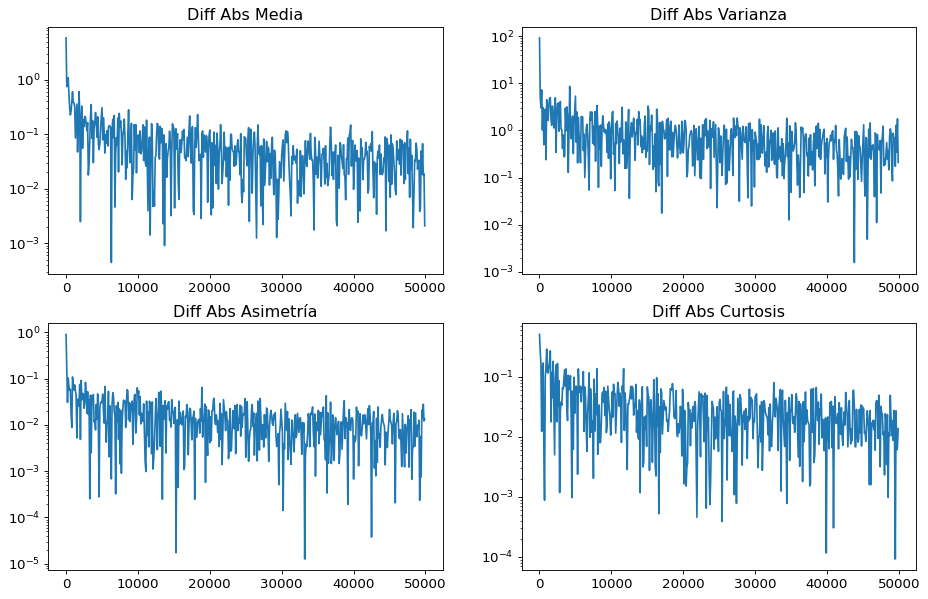

In [17]:
absDiffEstadisticosNorm(50,10)

Podemos ver que a partir de aproximadamente 20000 simulaciones la diferencia absoluta entre la media empírica y teorica es menor o igual a 0.1.
En el caso de la varianza, con aproximadamente 50000 simulaciones se alcanza una diferencia absoluta de 1.
Tanto en la asimetría como curtosis la diferencia siempre es pequeña ( la teórica es 0 ), y a partir de las 10000 simulaciones parece dejar de dismuir bruscamente. 

2) Cambie los valores de los parámetros y analice si hay cambios en su respuesta en (1)

Para valores pequeños del parámetro "media", podemos notar que la diferencia absoluta entre la media empírica y teórica disminuye de forma más abrupta, pero no vemos un cambio significativo en los demás estadísticos.
En cambio si aumentamos el parámetro varianza, vemos que se requiere de significativamente menos simulaciones para disminuir la diferencia absoluta de la asimetría y curtosis empíricas respecto a las teóricas.
Para la media y varianza en cambio, aumenta el número de simulaciones requeridas. 

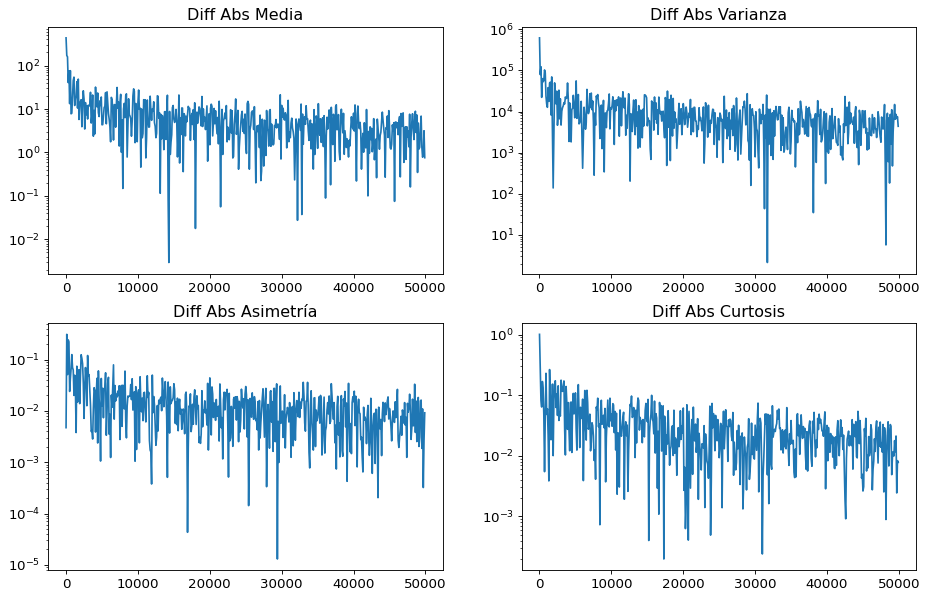

In [18]:
absDiffEstadisticosNorm(1,1000)

#### Ejercicio 4: 
Realice un desarrollo similar para el caso de una variable aleatoria continua distribuída chi-cuadrado de $k$ grados de libertad

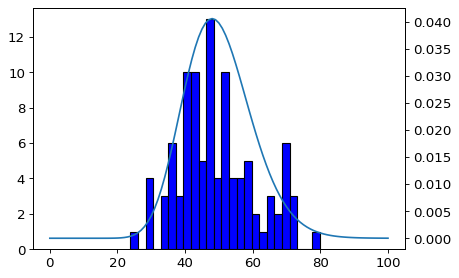

In [19]:
# Número de simulaciones
size = 100

# Grados de libertad
k = 50

# Arreglo con resultados de cada simulación
datos_chi = stats.chi2.rvs(k, size=size)

# Histograma distribución empírica
fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)
ax.hist(datos_chi, color = 'blue', edgecolor = 'black', bins = int(2*k/4))

# Distribución teórica
vec = list(range(2*k+1))
pvec = []
for i in vec:
    pvec.append(stats.chi2.pdf(i,k))

# Gráfica distribución teórica
ax2 = ax.twinx()
ax2.plot(vec,pvec)
plt.draw()

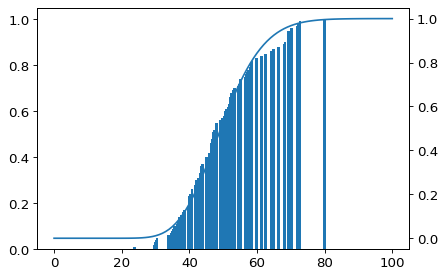

In [20]:
# Calcula la distribución empírica acumulada
def ecdf(data):
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

x,cum_chi = ecdf(datos_chi)

# Gráfica distribución empírica acumulada
fig, ax = plt.subplots(1, 1,figsize=(6, 4), dpi=80)
ax.bar(x,cum_chi)

# Probabilidad teórica
pvec = []
for i in vec:
    pvec.append(stats.chi2.cdf(i, k))

# Gráfica distribución teórica acumulada
ax2 = ax.twinx()
ax2.plot(vec,pvec)
plt.draw()

In [21]:
## Cálculo de esperanza y varianza empírica y teórica
promedio = sum(datos_chi)/size
var_emp = sum((datos_chi - promedio)*(datos_chi-promedio))/size
asim = stats.skew(datos_chi)
curtos = stats.kurtosis(datos_chi)
print('esperanza empírica:',promedio,' teórica: ',k)
print('varianza empírica:',var_emp,' teórica: ', 2*k)
print('asimetría empírica:', asim, 'teórica: ',np.sqrt(8/k))
print('curtosis empírico: ', curtos, 'teórico: ',12/k)

esperanza empírica: 49.33936924485917  teórica:  50
varianza empírica: 131.7841449942811  teórica:  100
asimetría empírica: 0.43867416169450063 teórica:  0.4
curtosis empírico:  -0.3108790497675371 teórico:  0.24


In [22]:
# Calcula diferencia relativa de estádisticos
# teóricos vs empíricos con diversos números de simulacioens
def relDiffEstadisticosChi2(k,precision):
    
    # Arreglo de número de simulaciones
    simulaciones = np.arange(2,10050,10)
    
    # Estadísticos teóricos
    med_teo = k
    var_teo = 2*k
    asi_teo = np.sqrt(8/k)
    cur_teo = 12/k
    
    # Almacena estádisticos empíticos de cada iteración
    med_emp = np.zeros(simulaciones.size)
    var_emp = np.zeros(simulaciones.size)
    asi_emp = np.zeros(simulaciones.size)
    cur_emp = np.zeros(simulaciones.size)
    
    for i in range(simulaciones.size):
        
        # Arreglo de resultados de cada simulación ( size simulaciones )
        datos_chi = stats.chi2.rvs(k, size=simulaciones[i])
        
        ## Cálculo de esperanza y varianza empírica y teórica
        med_emp[i] = np.sum(datos_chi)/simulaciones[i]
        var_emp[i] = sum((datos_chi - med_emp[i])*(datos_chi-med_emp[i]))/simulaciones[i]
        asi_emp[i] = stats.skew(datos_chi)
        cur_emp[i] = stats.kurtosis(datos_chi)
    
    # Diferencia relativa
    med_diff = abs((med_teo - med_emp)/med_teo)
    var_diff = abs((var_teo - var_emp)/var_teo)
    asi_diff = abs((asi_teo - asi_emp)/asi_teo)
    cur_diff = abs((cur_teo - cur_emp)/cur_teo)
    
    # Límite de error
    l1 = np.argwhere(med_diff>precision)
    l2 = np.argwhere(var_diff>precision)
    l3 = np.argwhere(asi_diff>precision)
    l4 = np.argwhere(cur_diff>precision)
    
    if l1.size != 0:
        med_lim = simulaciones[l1[-1]]
    else:
        med_lim = 0
        
    if l2.size != 0:
        var_lim = simulaciones[l2[-1]]
    else:
        var_lim = 0
        
    if l3.size != 0:
        asi_lim = simulaciones[l3[-1]]
    else:
        asi_lim = 0
        
    if l4.size != 0:
        cur_lim = simulaciones[l4[-1]]
    else:
        cur_lim = 0
        
    # Gráfica distribución empírica acumulada
    fig, ax = plt.subplots(2, 2,figsize=(14, 9), dpi=80)
    
    ax[0][0].set_title("Diff Rel Media")
    ax[0][1].set_title("Diff Rel Varianza")
    ax[1][0].set_title("Diff Rel Asimetría")
    ax[1][1].set_title("Diff Rel Curtosis")
    
    ax[0][0].plot(simulaciones,med_diff)
    ax[0][1].plot(simulaciones,var_diff)
    ax[1][0].plot(simulaciones,asi_diff)
    ax[1][1].plot(simulaciones,cur_diff)
    
    ax[0][0].axvline(x=med_lim, color="red")
    ax[0][0].text(med_lim,max(med_diff)/2," " + str(med_lim), color="red")
    ax[0][1].axvline(x=var_lim, color="red")
    ax[0][1].text(var_lim,max(var_diff)/2," " + str(var_lim), color="red")
    ax[1][0].axvline(x=asi_lim, color="red")
    ax[1][0].text(asi_lim,max(asi_diff)/2," " + str(asi_lim), color="red")
    ax[1][1].axvline(x=cur_lim, color="red")
    ax[1][1].text(cur_lim,max(cur_diff)/2," " + str(cur_lim), color="red")

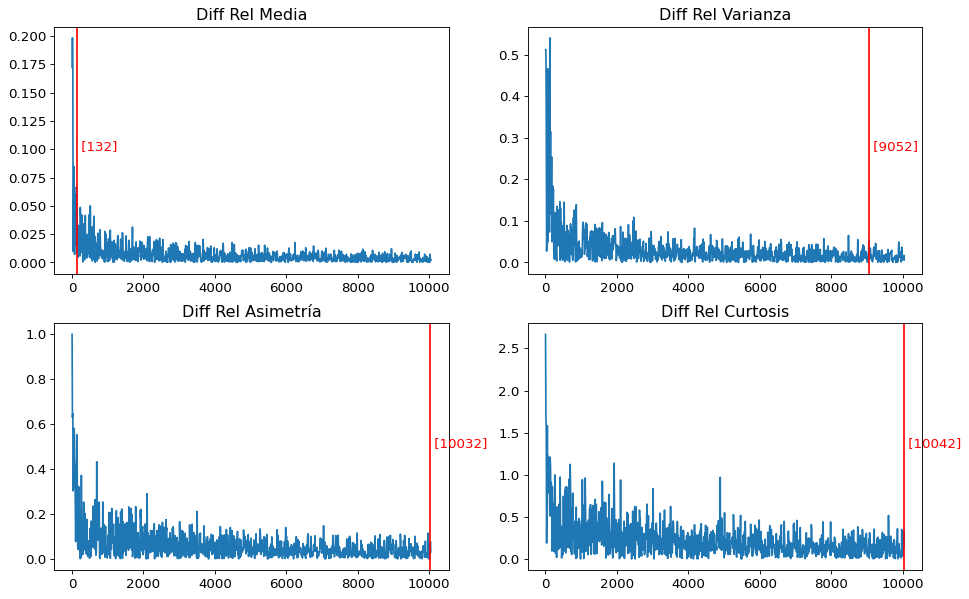

In [27]:
relDiffEstadisticosChi2(10,0.05)

Podemos notar que a medida que aumentamos el parámetro k, la convergencia entre la media y varianza empíricas respecto a las teóricas ocurre de forma más abrupta ( se requiere de menos simulaciones ). En el caso de la asimetría y curtosis, ocurre lo contrario.

#### Ejercicio 5 (2 puntos):
Utilice datos de sismicidad del Centro de Sismológico Nacional (http://evtdb.csn.uchile.cl/events), escoja dos  regiones geográficas en Chile (y la región del océano Pacífico contigua), con dimensiones de al menos 5 grados, tanto en longitud como latitud y grafique los histogramas de magnitud y profundidad de los eventos sísmicos significativos disponibles. Calcule parámetros empíricos para cada serie de datos.  Compare y concluya.

##### Respuesta
Región 1: 

- latitud: [-45, -35] # Linares hasta Puerto Aysén
- longitud: [-80, -72] # Frontera con Argentina hasta oceano pacífico

Región 2:

- latitud: [-30, -20] # Iquique hasta La Serena
- longitud: [-80 ,-68]  # Frontera con Argentina hasta oceano pacífico

In [24]:
def printResults(df):
    promedio = sum(df)/df.size
    var_emp = sum((df - promedio)*(df-promedio))/df.size
    asim = stats.skew(df)
    curtos = stats.kurtosis(df)
    print("promedio: ", promedio)
    print("varianza: ",var_emp)
    print("Asimetría: ", asim)
    print("Curtosis: ", curtos)
    print("\n")
    
data1 = pd.read_csv('data/region1.txt', delimiter= '\t')
data2 = pd.read_csv('data/region2.txt', delimiter= '\t')
display("Región de estudio 1 ")
display(data1.head(3))
display("Región de estudio 2 ")
display(data2.head(3))

'Región de estudio 1 '

,Fecha (UTC),Latitud [º],Longitud [º],Profundidad [km],Magnitud [*]
0,2018-07-02 02:45:32,-37.75,-72.74,40,4.3
1,2018-01-21 14:42:53,-36.07,-73.29,32,4.2
2,2019-09-26 16:36:17,-40.83,-72.29,140,6.0


'Región de estudio 2 '

,Fecha (UTC),Latitud [º],Longitud [º],Profundidad [km],Magnitud [*]
0,2019-08-28 12:43:44,-23.13,-69.23,108,5.2
1,2019-08-14 21:33:12,-20.74,-70.11,30,4.2
2,2019-01-31 19:49:50,-20.46,-69.00,102,4.0


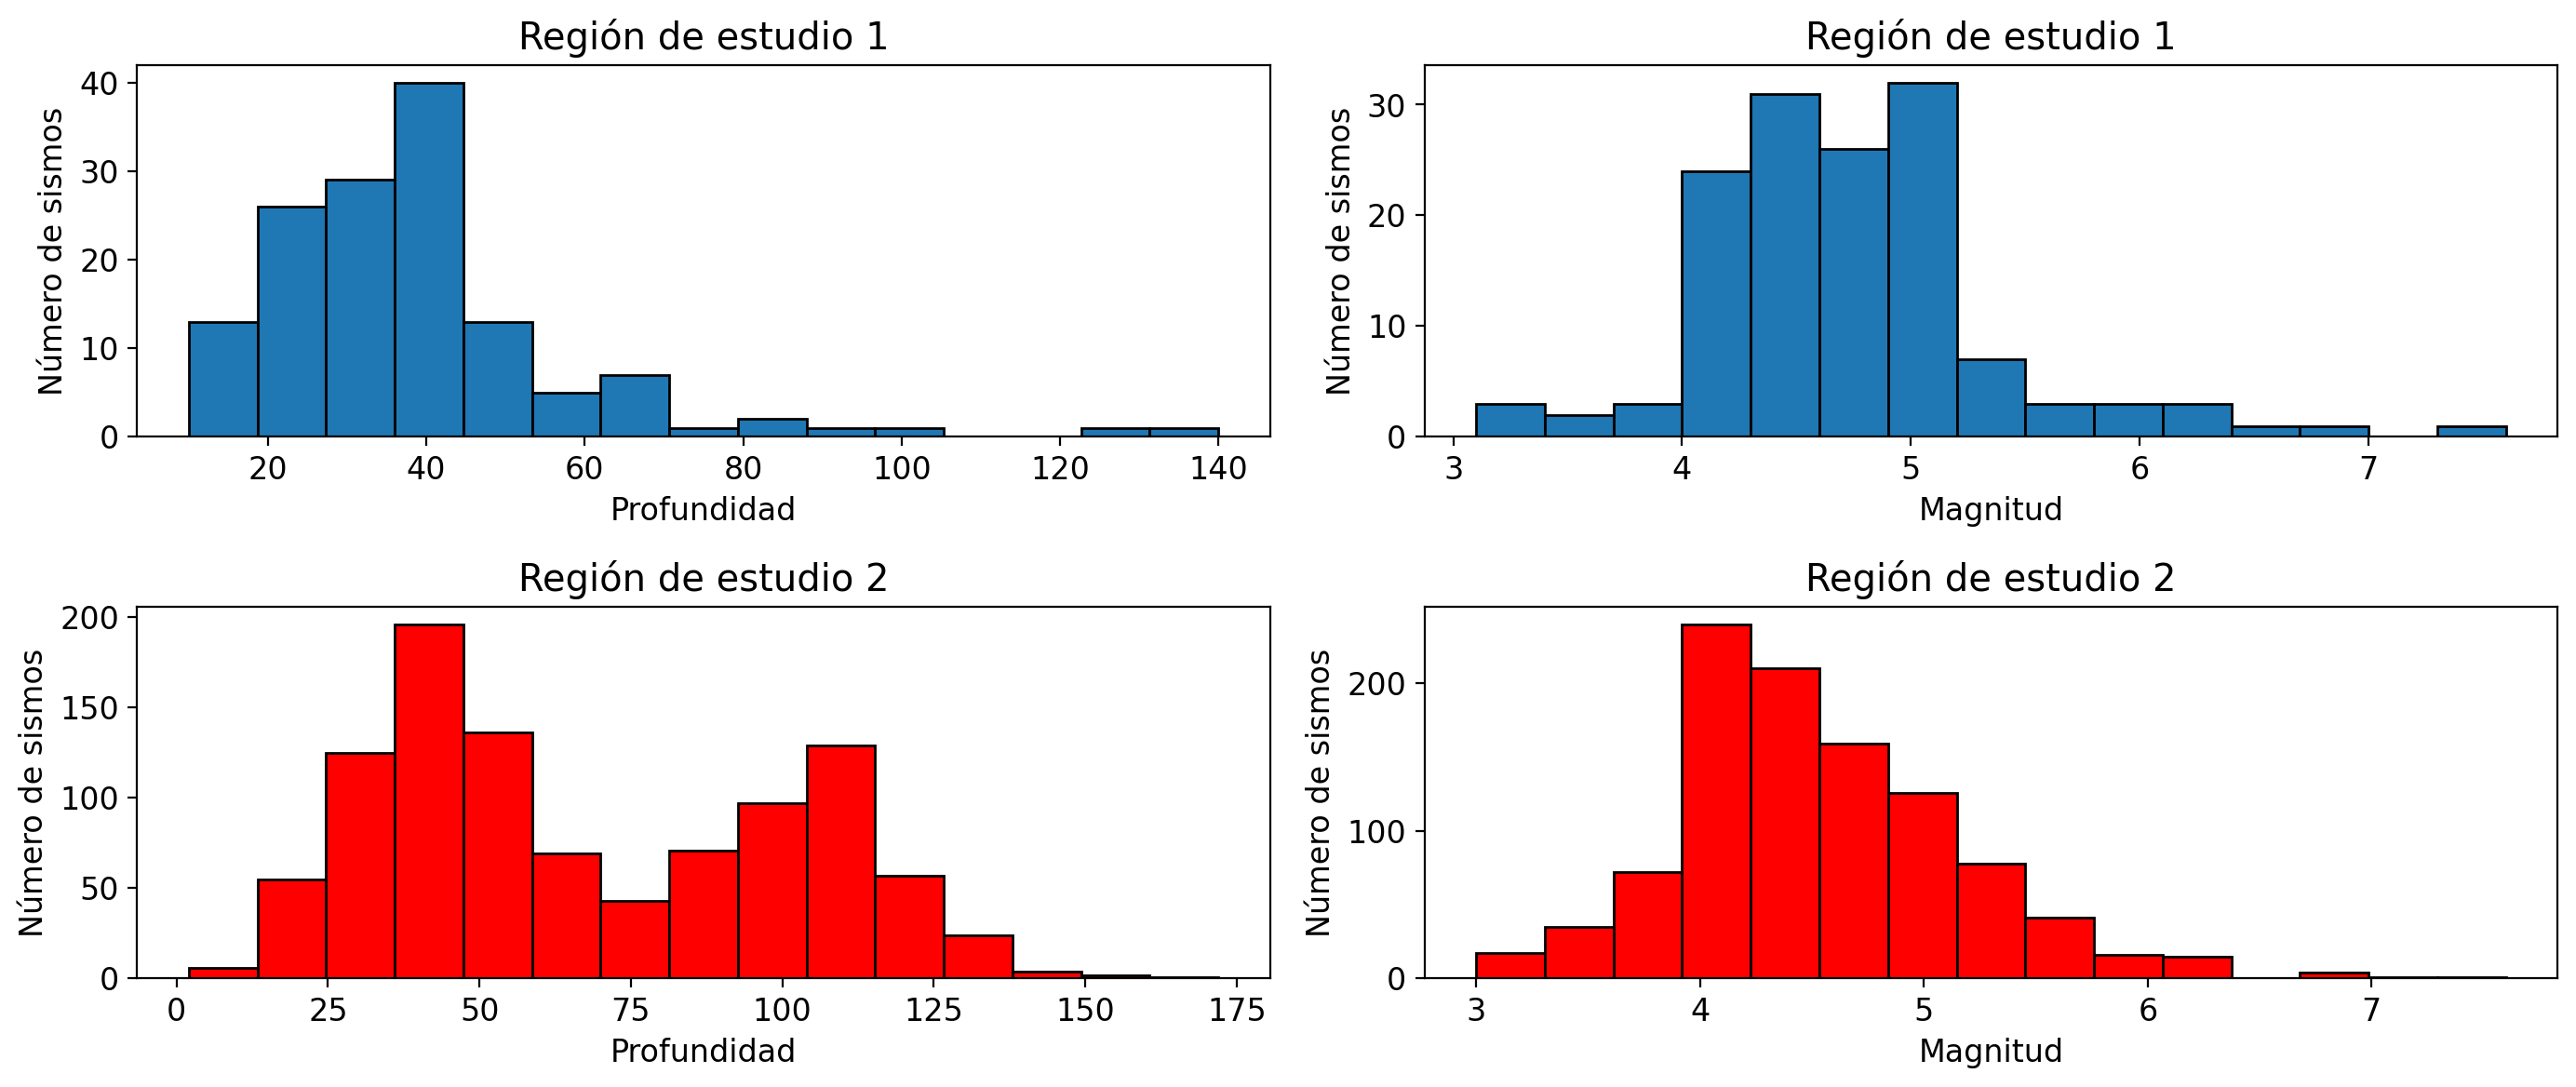

In [25]:
df1 = data1.iloc[:,3]
df2 = data1.iloc[:,4]
df3 = data2.iloc[:,3]
df4 = data2.iloc[:,4]

fig, axs = plt.subplots(2,2,figsize=(14, 6), tight_layout=True)
axs[0,0].hist(df1, edgecolor = 'black',bins = 15)
axs[0,0].set_xlabel('Profundidad')
axs[0,0].set_ylabel('Número de sismos')
axs[0,0].set_title('Región de estudio 1')

axs[0,1].hist(df2, edgecolor = 'black',bins = 15)
axs[0,1].set_xlabel('Magnitud')
axs[0,1].set_ylabel('Número de sismos')
axs[0,1].set_title('Región de estudio 1')

axs[1,0].hist(df3,color='red', edgecolor = 'black',bins = 15)
axs[1,0].set_xlabel('Profundidad')
axs[1,0].set_ylabel('Número de sismos')
axs[1,0].set_title('Región de estudio 2')

axs[1,1].hist(df4, color='red', edgecolor = 'black',bins=15)
axs[1,1].set_xlabel('Magnitud')
axs[1,1].set_ylabel('Número de sismos')
axs[1,1].set_title('Región de estudio 2')

plt.show()

In [26]:
print("Región de estudio 1: Profundidad")
printResults(df1)
print("Región de estudio 1: Magnitud")
printResults(df2)
print("Región de estudio 2: Profundidad")
printResults(df3)
print("Región de estudio 2: Magnitud")
printResults(df4)

Región de estudio 1: Profundidad
promedio:  38.042857142857144
varianza:  389.74102040816337
Asimetría:  2.0717395883621275
Curtosis:  6.946273216366439


Región de estudio 1: Magnitud
promedio:  4.690714285714288
varianza:  0.4314137755102038
Asimetría:  1.020342515068358
Curtosis:  3.0465034304451892


Región de estudio 2: Profundidad
promedio:  67.78916256157636
varianza:  1129.2087495450041
Asimetría:  0.35373522550743375
Curtosis:  -1.131254307389445


Región de estudio 2: Magnitud
promedio:  4.53330049261083
varianza:  0.38346250576330443
Asimetría:  0.6834139788286578
Curtosis:  1.2230840088722301




La región 1 corresponde a la zona sur y la región 2 corresponde a la zona norte entre Iquique y La Serena.

El histograma de produndidad de la región 1 es unimodal y el de la región 2 es bimodal, esto puede deberse a las diferencias geográficas de las regiones. 

En cuanto a magnitud, la mayoría de los sismos se encuentran entre los 4 a 5 grados.

### Referencias

https://github.com/WillKoehrsen/Data-Analysis/blob/master/univariate_dist/Histogram%20and%20Density%20Plot.ipynb
